In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import loompy
import matplotlib as mpl

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.settings.set_figure_params(dpi=80, color_map='viridis')
sc.logging.print_versions()

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
anndata     0.7.6
scanpy      1.7.2
sinfo       0.3.4
-----
PIL                 8.2.0
backcall            0.1.0
cached_property     1.5.2
cairo               1.18.1
cffi                1.13.2
cloudpickle         1.2.2
cycler              0.10.0
cython_runtime      NA
cytoolz             0.10.0
dask                2.4.0
dateutil            2.8.0
decorator           4.4.0
get_version         2.1
h5py                3.1.0
igraph              0.7.1
ipykernel           5.1.2
ipython_genutils    0.2.0
ipywidge

In [2]:
adata = sc.read_h5ad('/home/jovyan/Projects/Skin/Fetal_skin/organoid_degs/fetal_organoid_disease_no_embedding.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 857355 × 19236
    obs: 'sample_id', 'version', 'week', 'day', 'batch', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'percent_hb', 'percent_top50', 'leiden_bk_split5', 'annot', 'nh3_broad_annot1', 'sanger_id', 'chemistry', 'gender', 'pcw', 'sorting', 'sample', 'chemistry_sorting', 'cell_caller', 'scrublet_score', 'cluster_scrublet_score', 'doublet_pval', 'bh_doublet_pval', 'independent_annotation_broad1', 'independent_annotation_broad2', 'independent_annotation_broad3', 'independent_annotation_broad4', 'independent_annotation_broad5', 'joint_annotation', 'is_maternal', 'fig1b_annotation', 'mad_prd', 'Status', 'Site', 'Site_old', 'Tissue', 'Enrichment', 'Location', 'Sex', 'Age', 'stage', 'final', 'dataset'
    var: 'gene_ids-SKN8090524-EC', 'feature_types-SKN8090524-EC', 'gene_ids-SKN8090525-EC', 'feature_types-SKN8090525-EC', 'gene_ids-SKN8090526-EC', 'feature_types-SKN8090526-EC', 'gene_ids-SKN8090527-EC', 'feature_types-SKN8090527-EC', '

In [5]:
adata.obs.columns.unique()

Index(['sample_id', 'version', 'week', 'day', 'batch', 'n_counts', 'n_genes',
       'percent_mito', 'percent_ribo', 'percent_hb', 'percent_top50',
       'leiden_bk_split5', 'annot', 'nh3_broad_annot1', 'sanger_id',
       'chemistry', 'gender', 'pcw', 'sorting', 'sample', 'chemistry_sorting',
       'cell_caller', 'scrublet_score', 'cluster_scrublet_score',
       'doublet_pval', 'bh_doublet_pval', 'independent_annotation_broad1',
       'independent_annotation_broad2', 'independent_annotation_broad3',
       'independent_annotation_broad4', 'independent_annotation_broad5',
       'joint_annotation', 'is_maternal', 'fig1b_annotation', 'mad_prd',
       'Status', 'Site', 'Site_old', 'Tissue', 'Enrichment', 'Location', 'Sex',
       'Age', 'stage', 'final', 'dataset'],
      dtype='object')

In [15]:
list(adata.obs.annot.unique())

['OG_Mesenchymal',
 'OG_Basal KC',
 'OG_Suprabasal KC',
 'OG_HF Basal KC',
 'OG_MSC / HF bud',
 'OG_Proliferating mesenchymal',
 'OG_Melanocytes',
 'OG_CNCC-like / Schwann',
 'OG_Pericyte-like',
 'OG_Neuron progenitors',
 'OG_Merkel',
 'OG_CNCC-like',
 'OG_Endothelium',
 'OG_Myocyte-like',
 'OG_Basal stem-like KC',
 'OG_Immature neurons',
 'OG_Peridermal KC',
 'FT_Macrophage1',
 'FT_Monocyte (activated/differentiating)',
 'FT_Eo/baso/mast cell progenitor',
 'FT_DC2',
 'FT_Microglia',
 'FT_Monocyte precursor',
 'FT_Macrophage2',
 'FT_Monocyte',
 'FT_Fibroblast WNT2+',
 'FT_Activated mac',
 'FT_NK cell',
 'FT_B cell',
 'FT_LTi cell',
 'FT_ILC3',
 'FT_Inflammatory DC',
 'FT_MEMP - Early erythroid',
 'FT_CD4 T cell',
 'FT_Pro B cell',
 'FT_HSC',
 'FT_Pre B cell',
 'FT_Mac-mono',
 'FT_LE',
 'FT_Pre pro B cell',
 'FT_NKT cell',
 'FT_CD8 T cell',
 'FT_Myocytes',
 'FT_pDC',
 'FT_Mast cell (most mature)',
 'FT_DC1',
 'FT_Mast cell (medium)',
 'FT_Capillary (venular tip)',
 'FT_Neutrophil2',
 'F

In [17]:
adata_org_endo = sc.read_h5ad('/home/jovyan/Projects/Skin/Fetal_skin/organoid_degs/pooled_endothelium.processed.h5ad')

/home/jovyan/my-conda-envs/scrna/lib/python3.6/site-packages/anndata/compat/__init__.py:183: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  FutureWarning,
/home/jovyan/my-conda-envs/scrna/lib/python3.6/site-packages/anndata/compat/__init__.py:183: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  FutureWarning,


In [18]:
adata_org_endo

AnnData object with n_obs × n_vars = 2048 × 14908
    obs: 'batch', 'chemistry_sorting', 'dataset', 'day', 'donor', 'gender', 'n_counts', 'n_genes', 'nh3_annot1', 'percent_hb', 'percent_mito', 'percent_ribo', 'percent_top50', 'rachel_annot3', 'sample_id', 'strain', 'week', 'annot', 'leiden_hm_r0_1', 'leiden_hm_r0_3', 'leiden_hm_r0_5', 'leiden_hm_r0_7', 'leiden_hm_r0_9', 'leiden_hm_split1', 'joint_annot', '__is_in_cluster__', 'leiden_r0_1', 'leiden_r0_3', 'leiden_r0_5', 'leiden_r0_7', 'leiden_r0_9'
    var: 'gene_ids', 'hb', 'cc', 'mito', 'ribo', 'n_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'hvg_full'
    uns: 'dendrogram_joint_annot', 'leiden', 'neighbors', 'neighbors_hm', 'pca', 'rank_genes_groups_de.Capillary (arterial tip)-Capillary (venular tip)', 'rank_genes_groups_de.Capillary (arterial tip)-Capillary (venular tip)_filtered', 'rank_genes_groups_de.Capillary (venular tip)-Capillary (arterial tip)', 'rank_genes_groups_de.Capillary (venular t

In [20]:
list(adata_org_endo.obs.joint_annot.unique())

['LE',
 'Capillary/postcapillary venule',
 'Postcapillary venule',
 'Early LE',
 'Tip cell (arterial)',
 'Early endothelial cell',
 'Capillary (venular tip)',
 'Arterial']

In [21]:
input_file = '/home/jovyan/Projects/Skin/Fetal_skin/Lineages/Objects/Ni_endo_data_050721.h5ad'
adata_fetal_endo = sc.read_h5ad(input_file)

In [22]:
input_file2 = '/home/jovyan/Projects/Skin/Fetal_skin/fetal_skin.norm.maternal_removed.20210611.h5ad'
final_ad = sc.read_h5ad(input_file2)

In [23]:
adata_fetal_endo = adata_fetal_endo[adata_fetal_endo.obs_names.isin(final_ad.obs_names)][:]
final_ad = final_ad[final_ad.obs_names.isin(adata_fetal_endo.obs_names)][:]

/home/jovyan/my-conda-envs/scrna/lib/python3.6/site-packages/anndata/compat/__init__.py:216: FutureWarning: During AnnData slicing, found matrix at .uns['neighbors_bk']['connectivities'] that happens to be dimensioned at n_obs×n_obs (2173×2173).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  FutureWarning,
/home/jovyan/my-conda-envs/scrna/lib/python3.6/site-packages/anndata/compat/__init__.py:216: FutureWarning: During AnnData slicing, found matrix at .uns['neighbors_bk']['distances'] that happens to be dimensioned at n_obs×n_obs (2173×2173).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  FutureWarning,
/home/jovyan/my-conda-envs/scrna/lib/python3.6/site-packages/anndata/compat/__init__.py:216: FutureWarning: During AnnData slicing, found matrix at .uns['neighbors_hm']['connectivities'] that happens to be dimensioned at n_obs×n_obs (2173×2173).

Th

In [24]:
adata_fetal_endo

View of AnnData object with n_obs × n_vars = 2173 × 18354
    obs: 'bh_doublet_pval', 'cell_caller', 'cluster_scrublet_score', 'doublet_pval', 'mt_prop', 'n_counts', 'n_genes', 'sanger_id', 'scrublet_score', 'chemistry', 'donor', 'gender', 'pcw', 'sorting', 'sample', 'chemistry_sorting', 'annot', 'hierarchy1', 'rachel_annot1', 'percent_mito', 'percent_ribo', 'percent_hb', 'percent_top50', 'leiden_hm_r0_1', 'leiden_hm_r0_2', 'leiden_hm_r0_3', 'leiden_hm_r0_4', 'leiden_hm_r0_5', 'leiden_bk_r0_1', 'leiden_bk_r0_2', 'leiden_bk_r0_3', 'leiden_bk_r0_4', 'leiden_bk_r0_5', 'rachel_annot2', 'rachel_annot3'
    var: 'gene_ids', 'cc', 'mito', 'ribo', 'hb', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'hvg_full'
    uns: 'leiden', 'neighbors', 'neighbors_bk', 'neighbors_hm', 'pca', 'rachel_annot3_colors'
    obsm: 'X_pca', 'X_pca_hm', 'X_umap_hm', 'X_umap_bk'
    varm: 'PCs'
    obsp: 'distances', 'connectivit

In [25]:
adata_fetal_endo.obs['independent_annotation_refined'] = final_ad.obs['independent_annotation_refined'][:]

Trying to set attribute `.obs` of view, copying.


In [26]:
list(adata_fetal_endo.obs['independent_annotation_refined'].unique())

['LE',
 'Capillary (venular tip)',
 'Tip cell (arterial)',
 'Capillary/postcapillary venule',
 'Early LE',
 'Early endothelial cell',
 'Arterial',
 'Postcapillary venule']

In [27]:
%run /home/jovyan/Projects/Skin/Fetal_skin/June2021/_markers.py

# Subset items of interest

In [29]:
adata_fetal_endo = adata_fetal_endo[adata_fetal_endo.obs['independent_annotation_refined'].isin(['Tip cell (arterial)'])] 
#square brackets defines a list, curly brackets defines a dictionary
adata_fetal_endo.obs.groupby(['independent_annotation_refined']).apply(len)

independent_annotation_refined
Tip cell (arterial)    134
dtype: int64

In [37]:
adata_fetal_endo.obs['anno_fetal']=adata_fetal_endo.obs.independent_annotation_refined.astype(str) + '_fetal'
adata_fetal_endo.obs['anno_fetal'] = adata_fetal_endo.obs['anno_fetal'].astype('category')

In [38]:
adata_fetal_endo.obs.anno_fetal.unique()

[Tip cell (arterial)_fetal]
Categories (1, object): [Tip cell (arterial)_fetal]

In [30]:
adata_org_endo = adata_org_endo[adata_org_endo.obs['joint_annot'].isin(['Tip cell (arterial)'])] 
#square brackets defines a list, curly brackets defines a dictionary
adata_org_endo.obs.groupby(['joint_annot']).apply(len)

/home/jovyan/my-conda-envs/scrna/lib/python3.6/site-packages/anndata/compat/__init__.py:216: FutureWarning: During AnnData slicing, found matrix at .uns['neighbors_hm']['connectivities'] that happens to be dimensioned at n_obs×n_obs (2048×2048).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  FutureWarning,
/home/jovyan/my-conda-envs/scrna/lib/python3.6/site-packages/anndata/compat/__init__.py:216: FutureWarning: During AnnData slicing, found matrix at .uns['neighbors_hm']['distances'] that happens to be dimensioned at n_obs×n_obs (2048×2048).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  FutureWarning,


joint_annot
Tip cell (arterial)    225
dtype: int64

In [39]:
adata_org_endo.obs['anno_fetal']=adata_org_endo.obs.joint_annot.astype(str) + '_organoid'
adata_org_endo.obs['anno_fetal'] = adata_org_endo.obs['anno_fetal'].astype('category')

Trying to set attribute `.obs` of view, copying.


In [40]:
adata_org_endo.obs.anno_fetal.unique()

[Tip cell (arterial)_organoid]
Categories (1, object): [Tip cell (arterial)_organoid]

In [42]:
adata_list = [adata_fetal_endo, adata_org_endo]
concat = sc.AnnData.concatenate(*adata_list, join='inner', batch_categories=None ,index_unique=None)

/home/jovyan/my-conda-envs/scrna/lib/python3.6/site-packages/anndata/_core/merge.py:811: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  [getattr(a, dim) for a in adatas], join=join, ignore_index=True
/home/jovyan/my-conda-envs/scrna/lib/python3.6/site-packages/anndata/_core/anndata.py:794: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  value_idx = self._prep_dim_index(value.index, attr)


In [43]:
concat

AnnData object with n_obs × n_vars = 359 × 14908
    obs: '__is_in_cluster__', 'anno_fetal', 'annot', 'batch', 'bh_doublet_pval', 'cell_caller', 'chemistry', 'chemistry_sorting', 'cluster_scrublet_score', 'dataset', 'day', 'donor', 'doublet_pval', 'gender', 'hierarchy1', 'independent_annotation_refined', 'joint_annot', 'leiden_bk_r0_1', 'leiden_bk_r0_2', 'leiden_bk_r0_3', 'leiden_bk_r0_4', 'leiden_bk_r0_5', 'leiden_hm_r0_1', 'leiden_hm_r0_2', 'leiden_hm_r0_3', 'leiden_hm_r0_4', 'leiden_hm_r0_5', 'leiden_hm_r0_7', 'leiden_hm_r0_9', 'leiden_hm_split1', 'leiden_r0_1', 'leiden_r0_3', 'leiden_r0_5', 'leiden_r0_7', 'leiden_r0_9', 'mt_prop', 'n_counts', 'n_genes', 'nh3_annot1', 'pcw', 'percent_hb', 'percent_mito', 'percent_ribo', 'percent_top50', 'rachel_annot1', 'rachel_annot2', 'rachel_annot3', 'sample', 'sample_id', 'sanger_id', 'scrublet_score', 'sorting', 'strain', 'week'
    var: 'gene_ids', 'hb', 'cc', 'mito', 'ribo', 'n_cells-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispe

In [44]:
concat.obs.anno_fetal.unique()

array(['Tip cell (arterial)_fetal', 'Tip cell (arterial)_organoid'],
      dtype=object)

In [46]:
concat.obs['anno_fetal'] = concat.obs['anno_fetal'].astype('category')

In [47]:
mkst = calc_marker_stats(concat, 'anno_fetal')

In [48]:
mkst[2]

,top_frac_group,top_frac,frac_diff,max_frac_diff,top_mean_group,top_mean,mean_diff,max_mean_diff
LINC00115,Tip cell (arterial)_fetal,0.029851,0.003184,0.003184,Tip cell (arterial)_organoid,0.015718,0.001475,0.001475
FAM41C,Tip cell (arterial)_organoid,0.013333,0.005871,0.005871,Tip cell (arterial)_organoid,0.009860,0.005637,0.005637
SAMD11,Tip cell (arterial)_fetal,0.007463,0.007463,0.007463,Tip cell (arterial)_fetal,0.007463,0.007463,0.007463
NOC2L,Tip cell (arterial)_fetal,0.335821,0.015821,0.015821,Tip cell (arterial)_fetal,0.145463,0.004611,0.004611
KLHL17,Tip cell (arterial)_organoid,0.008889,0.001426,0.001426,Tip cell (arterial)_organoid,0.005951,0.002858,0.002858
HES4,Tip cell (arterial)_organoid,0.222222,0.140133,0.140133,Tip cell (arterial)_organoid,0.101505,0.067981,0.067981
ISG15,Tip cell (arterial)_fetal,0.507463,0.014129,0.014129,Tip cell (arterial)_fetal,0.219520,0.029809,0.029809
AGRN,Tip cell (arterial)_fetal,0.477612,0.099834,0.099834,Tip cell (arterial)_fetal,0.237162,0.062824,0.062824
C1orf159,Tip cell (arterial)_organoid,0.048889,0.004113,0.004113,Tip cell (arterial)_fetal,0.024690,0.001104,0.001104
TNFRSF18,Tip cell (arterial)_organoid,0.035556,0.013167,0.013167,Tip cell (arterial)_organoid,0.018926,0.007196,0.007196


In [50]:
sc.set_figure_params(figsize=[7,7],dpi=120, dpi_save=300)

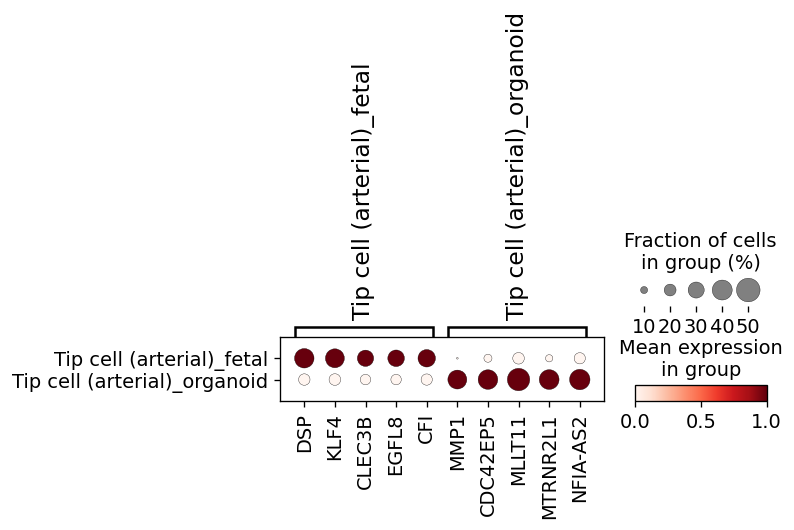

In [51]:
mks = filter_marker_stats(mkst[2], max_next_frac=0.2, min_mean_diff=0.3, how='or')
plot_markers(concat, 'anno_fetal', mks, standard_scale='var') #,save='dotplot_endo'

In [52]:
def test_markers(ad, mks, groupby, n_genes=100, use_raw=True, **kwargs):
    genes = top_markers(mks, top_n=n_genes)
    aux_ad = anndata.AnnData(
        X=ad.raw.X if use_raw else ad.X,
        obs=ad.obs.copy(),
        var=ad.raw.var.copy() if use_raw else ad.var.copy()
    )
    aux_ad = aux_ad[:, genes].copy()
    sc.tl.rank_genes_groups(aux_ad, groupby=groupby, n_genes=n_genes, use_raw=False, **kwargs)
    de_tbl = extract_de_table(aux_ad.uns['rank_genes_groups'])
    return mks.reset_index().rename(columns={'index': 'genes', 'top_frac_group': 'cluster'}).merge(
        de_tbl[['cluster', 'genes', 'logfoldchanges', 'pvals', 'pvals_adj']], how='left'
    )

def extract_de_table(de_dict):
    """
    Extract DE table from adata.uns
    """
    if de_dict['params']['method'] == 'logreg':
        requested_fields = ('scores',)
    else:
        requested_fields = ('scores', 'logfoldchanges', 'pvals', 'pvals_adj',)
    gene_df = _recarray_to_dataframe(de_dict['names'], 'genes')[
        ['cluster', 'rank', 'genes']]
    gene_df['ref'] = de_dict['params']['reference']
    gene_df = gene_df[['cluster', 'ref', 'rank', 'genes']]
    de_df = pd.DataFrame({
        field: _recarray_to_dataframe(de_dict[field], field)[field]
        for field in requested_fields if field in de_dict
    })
    de_tbl = gene_df.merge(de_df, left_index=True, right_index=True)
    de_tbl = de_tbl.loc[de_tbl.genes.astype(str) != 'nan', :]
    return de_tbl


def _recarray_to_dataframe(array, field_name):
    return pd.DataFrame(array).reset_index().rename(
        columns={'index': 'rank'}).melt(
            id_vars='rank', var_name='cluster', value_name=field_name)

def top_markers(df, top_n=5, groupby='top_frac_group'):
    return df.groupby(groupby).head(top_n).index.to_list()

In [53]:
deg = test_markers(concat, mks, 'anno_fetal', method='wilcoxon')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


In [54]:
deg

,genes,cluster,top_frac,frac_diff,max_frac_diff,top_mean_group,top_mean,mean_diff,max_mean_diff,logfoldchanges,pvals,pvals_adj
0,DSP,Tip cell (arterial)_fetal,0.388060,0.196949,0.196949,Tip cell (arterial)_fetal,0.172271,0.090481,0.090481,1.223185,0.001548,0.010657
1,KLF4,Tip cell (arterial)_fetal,0.373134,0.177579,0.177579,Tip cell (arterial)_fetal,0.173834,0.083992,0.083992,1.119615,0.004994,0.025405
2,CLEC3B,Tip cell (arterial)_fetal,0.305970,0.137081,0.137081,Tip cell (arterial)_fetal,0.163591,0.075141,0.075141,1.029682,0.026947,0.071654
3,EGFL8,Tip cell (arterial)_fetal,0.313433,0.144544,0.144544,Tip cell (arterial)_fetal,0.161815,0.074470,0.074470,1.042785,0.022570,0.071237
4,CFI,Tip cell (arterial)_fetal,0.335821,0.149154,0.149154,Tip cell (arterial)_fetal,0.171543,0.072245,0.072245,0.881130,0.021325,0.069305
5,TRAPPC5,Tip cell (arterial)_fetal,0.261194,0.123416,0.123416,Tip cell (arterial)_fetal,0.150749,0.071542,0.071542,1.012647,0.050995,0.095989
6,DDIT3,Tip cell (arterial)_fetal,0.320896,0.120896,0.120896,Tip cell (arterial)_fetal,0.171952,0.071025,0.071025,0.860014,0.043452,0.090783
7,C17orf49,Tip cell (arterial)_fetal,0.291045,0.117711,0.117711,Tip cell (arterial)_fetal,0.165410,0.069478,0.069478,0.863827,0.056952,0.095989
8,MFNG,Tip cell (arterial)_fetal,0.298507,0.129619,0.129619,Tip cell (arterial)_fetal,0.163463,0.069404,0.069404,0.879638,0.042211,0.090476
9,CDKAL1,Tip cell (arterial)_fetal,0.328358,0.132803,0.132803,Tip cell (arterial)_fetal,0.151947,0.068765,0.068765,0.990305,0.026158,0.071654


In [55]:
deg.to_csv('/home/jovyan/Projects/Skin/Fetal_skin/organoid_degs/DEG_tipcell_fetal_organoid.csv')

### Neuronal

In [2]:
adata_neu = sc.read_h5ad('/home/jovyan/Projects/Skin/Fetal_skin/organoid_degs/pooled_neuronal.processed.cellxgene.h5ad')

In [3]:
adata_neu.obs

,batch,chemistry_sorting,dataset,day,donor,gender,n_counts,n_genes,nh3_annot1,percent_hb,percent_mito,percent_ribo,percent_top50,sample_id,strain,week,annot,joint_annot
index,,,,,,,,,,,,,,,,,,
CGGGTCAGTTATCACG-1-4834STDY7002880-fetal_skin,4834STDY7002880,SC3Pv2_CD45N,fetal_skin,nan,F16,male,12251.0,3339,nan,0.620358,3.844584,28.414007,30.242429,nan,nan,8,fsk_Schwann cells,Schwann cells/Schwann precursors
GGGCATCTCCGCGTTT-1-4834STDY7002880-fetal_skin,4834STDY7002880,SC3Pv2_CD45N,fetal_skin,nan,F16,male,2866.0,1344,nan,0.837404,8.897418,11.758549,39.637125,nan,nan,8,fsk_Schwann cells,Schwann cells/Schwann precursors
GTCACAACAGGACGTA-1-4834STDY7002880-fetal_skin,4834STDY7002880,SC3Pv2_CD45N,fetal_skin,nan,F16,male,1325.0,865,nan,0.679245,7.018868,8.075472,27.094340,nan,nan,8,fsk_Schwann cells,Schwann cells/Schwann precursors
TGGCTGGCAAGCGCTC-1-4834STDY7002880-fetal_skin,4834STDY7002880,SC3Pv2_CD45N,fetal_skin,nan,F16,male,5536.0,2119,nan,0.632225,1.372832,26.083815,31.015173,nan,nan,8,fsk_Schwann cells,Schwann cells/Schwann precursors
ACTGATGAGTGTGAAT-1-4834STDY7002883-fetal_skin,4834STDY7002883,SC3Pv2_Total,fetal_skin,nan,F17,male,9385.0,3377,nan,0.106553,0.703250,14.640384,21.885988,nan,nan,9,fsk_Neuronal,Neuron progenitors
AGATCTGCATCCTTGC-1-4834STDY7002883-fetal_skin,4834STDY7002883,SC3Pv2_Total,fetal_skin,nan,F17,male,11809.0,3362,nan,0.152426,1.464984,25.065628,27.995597,nan,nan,9,fsk_Schwann cells,Schwann cells/Schwann precursors
AGTAGTCTCGTTGACA-1-4834STDY7002883-fetal_skin,4834STDY7002883,SC3Pv2_Total,fetal_skin,nan,F17,male,10902.0,3236,nan,0.045863,2.559163,26.930840,26.031921,nan,nan,9,fsk_Schwann cells,Schwann cells/Schwann precursors
CATCCACAGGGTTTCT-1-4834STDY7002883-fetal_skin,4834STDY7002883,SC3Pv2_Total,fetal_skin,nan,F17,male,10399.0,3182,nan,0.086547,1.779017,24.906240,26.877584,nan,nan,9,fsk_Schwann cells,Schwann cells/Schwann precursors
CATGACATCATCACCC-1-4834STDY7002883-fetal_skin,4834STDY7002883,SC3Pv2_Total,fetal_skin,nan,F17,male,14745.0,3713,nan,0.101729,2.475415,25.466261,30.179722,nan,nan,9,fsk_Schwann cells,Myelinating Schwann cells


In [4]:
list(adata_neu.obs.joint_annot.unique())

['Schwann cells/Schwann precursors',
 'Neuron progenitors',
 'Myelinating Schwann cells',
 'Secreting neuron',
 'Neuroepithelial cells',
 'Merkel cells',
 'Neuron progenitors SPP1+']

In [5]:
adata_neu.obs['for_deg']=adata_neu.obs.joint_annot.astype(str) + adata_neu.obs.dataset.astype(str)
adata_neu.obs['for_deg'] = adata_neu.obs['for_deg'].astype('category')

In [6]:
list(adata_neu.obs.for_deg.unique())

['Schwann cells/Schwann precursorsfetal_skin',
 'Neuron progenitorsfetal_skin',
 'Myelinating Schwann cellsfetal_skin',
 'Secreting neuronfetal_skin',
 'Neuroepithelial cellsfetal_skin',
 'Merkel cellsfetal_skin',
 'Neuron progenitors SPP1+fetal_skin',
 'Myelinating Schwann cellsorganoid',
 'Secreting neuronorganoid',
 'Schwann cells/Schwann precursorsorganoid',
 'Neuron progenitors SPP1+organoid',
 'Neuron progenitorsorganoid',
 'Neuroepithelial cellsorganoid',
 'Merkel cellsorganoid']

In [7]:
%run /home/jovyan/Projects/Skin/Fetal_skin/June2021/_markers.py

# Subset items of interest - Schwann cells/Schwann precursors

In [8]:
adata_neu1 = adata_neu[adata_neu.obs['for_deg'].isin(['Schwann cells/Schwann precursorsfetal_skin', 'Schwann cells/Schwann precursorsorganoid'])] 
#square brackets defines a list, curly brackets defines a dictionary
adata_neu1.obs.groupby(['for_deg']).apply(len)

for_deg
Schwann cells/Schwann precursorsfetal_skin    3381
Schwann cells/Schwann precursorsorganoid      2757
dtype: int64

In [9]:
adata_neu2 = adata_neu[adata_neu.obs['for_deg'].isin(['Neuron progenitorsfetal_skin', 'Neuron progenitorsorganoid'])] 
#square brackets defines a list, curly brackets defines a dictionary
adata_neu2.obs.groupby(['for_deg']).apply(len)

for_deg
Neuron progenitorsfetal_skin     331
Neuron progenitorsorganoid      1481
dtype: int64

In [10]:
adata_neu3 = adata_neu[adata_neu.obs['for_deg'].isin(['Myelinating Schwann cellsfetal_skin', 'Myelinating Schwann cellsorganoid'])] 
#square brackets defines a list, curly brackets defines a dictionary
adata_neu3.obs.groupby(['for_deg']).apply(len)

for_deg
Myelinating Schwann cellsfetal_skin    712
Myelinating Schwann cellsorganoid      472
dtype: int64

In [11]:
adata_neu4 = adata_neu[adata_neu.obs['for_deg'].isin(['Secreting neuronfetal_skin', 'Secreting neuronorganoid'])] 
#square brackets defines a list, curly brackets defines a dictionary
adata_neu4.obs.groupby(['for_deg']).apply(len)

for_deg
Secreting neuronfetal_skin     88
Secreting neuronorganoid      318
dtype: int64

In [12]:
adata_neu5 = adata_neu[adata_neu.obs['for_deg'].isin(['Neuroepithelial cellsfetal_skin', 'Neuroepithelial cellsorganoid'])] 
#square brackets defines a list, curly brackets defines a dictionary
adata_neu5.obs.groupby(['for_deg']).apply(len)

for_deg
Neuroepithelial cellsfetal_skin    100
Neuroepithelial cellsorganoid      818
dtype: int64

In [13]:
adata_neu6 = adata_neu[adata_neu.obs['for_deg'].isin(['Merkel cellsfetal_skin', 'Merkel cellsorganoid'])] 
#square brackets defines a list, curly brackets defines a dictionary
adata_neu6.obs.groupby(['for_deg']).apply(len)

for_deg
Merkel cellsfetal_skin      3
Merkel cellsorganoid      129
dtype: int64

In [14]:
adata_neu7 = adata_neu[adata_neu.obs['for_deg'].isin(['Neuron progenitors SPP1+fetal_skin', 'Neuron progenitors SPP1+organoid'])] 
#square brackets defines a list, curly brackets defines a dictionary
adata_neu7.obs.groupby(['for_deg']).apply(len)

for_deg
Neuron progenitors SPP1+fetal_skin    475
Neuron progenitors SPP1+organoid      806
dtype: int64

In [51]:
adata_neu7.obs['for_deg'] = adata_neu7.obs['for_deg'].astype('category')

Trying to set attribute `.obs` of view, copying.


In [52]:
mkst = calc_marker_stats(adata_neu7, 'for_deg', use_rep="X")

In [53]:
mkst[2]

,top_frac_group,top_frac,frac_diff,max_frac_diff,top_mean_group,top_mean,mean_diff,max_mean_diff
FAM87B,Neuron progenitors SPP1+fetal_skin,0.002105,0.002105,0.002105,Neuron progenitors SPP1+fetal_skin,0.002105,0.002105,0.002105
LINC00115,Neuron progenitors SPP1+fetal_skin,0.035789,0.007253,0.007253,Neuron progenitors SPP1+fetal_skin,0.026984,0.013105,0.013105
FAM41C,Neuron progenitors SPP1+organoid,0.008685,0.006580,0.006580,Neuron progenitors SPP1+organoid,0.005889,0.004169,0.004169
SAMD11,Neuron progenitors SPP1+organoid,0.031017,0.026807,0.026807,Neuron progenitors SPP1+organoid,0.017641,0.015259,0.015259
NOC2L,Neuron progenitors SPP1+fetal_skin,0.366316,0.133065,0.133065,Neuron progenitors SPP1+fetal_skin,0.218837,0.123975,0.123975
KLHL17,Neuron progenitors SPP1+organoid,0.012407,0.006091,0.006091,Neuron progenitors SPP1+organoid,0.006877,0.001797,0.001797
PLEKHN1,Neuron progenitors SPP1+organoid,0.001241,0.001241,0.001241,Neuron progenitors SPP1+organoid,0.001241,0.001241,0.001241
HES4,Neuron progenitors SPP1+organoid,0.507444,0.357970,0.357970,Neuron progenitors SPP1+organoid,0.227835,0.163237,0.163237
ISG15,Neuron progenitors SPP1+organoid,0.246898,0.217425,0.217425,Neuron progenitors SPP1+organoid,0.086230,0.076301,0.076301
AGRN,Neuron progenitors SPP1+organoid,0.276675,0.024043,0.024043,Neuron progenitors SPP1+fetal_skin,0.127888,0.018356,0.018356


In [54]:
sc.set_figure_params(figsize=[7,7],dpi=120, dpi_save=300)

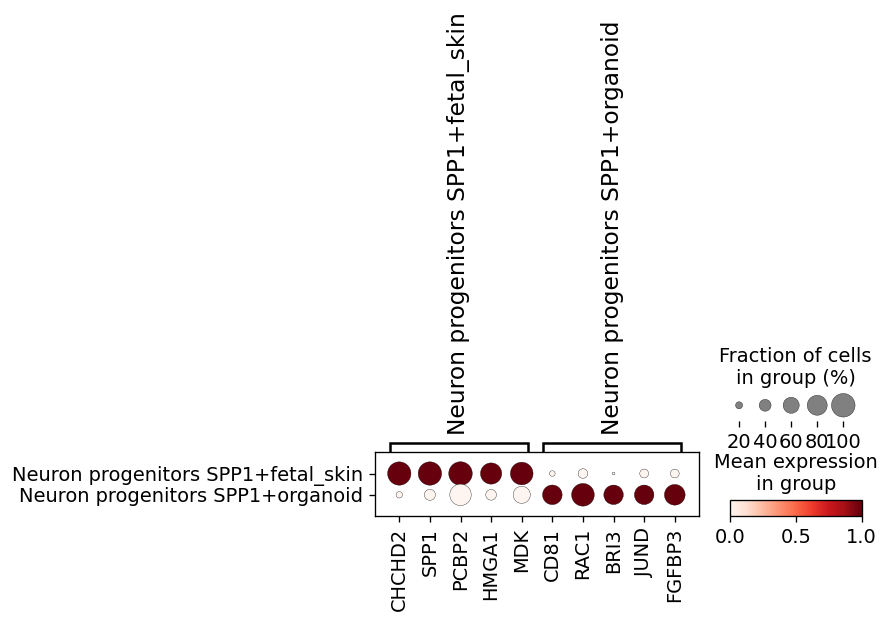

In [55]:
mks = filter_marker_stats(mkst[2], max_next_frac=0.2, min_mean_diff=0.3, how='or')
plot_markers(adata_neu7, 'for_deg', mks, standard_scale='var') #,save='dotplot_endo'

In [56]:
def test_markers(ad, mks, groupby, n_genes=100, use_raw=True, **kwargs):
    genes = top_markers(mks, top_n=n_genes)
    aux_ad = anndata.AnnData(
        X=ad.raw.X if use_raw else ad.X,
        obs=ad.obs.copy(),
        var=ad.raw.var.copy() if use_raw else ad.var.copy()
    )
    aux_ad = aux_ad[:, genes].copy()
    sc.tl.rank_genes_groups(aux_ad, groupby=groupby, n_genes=n_genes, use_raw=False, **kwargs)
    de_tbl = extract_de_table(aux_ad.uns['rank_genes_groups'])
    return mks.reset_index().rename(columns={'index': 'genes', 'top_frac_group': 'cluster'}).merge(
        de_tbl[['cluster', 'genes', 'logfoldchanges', 'pvals', 'pvals_adj']], how='left'
    )

def extract_de_table(de_dict):
    """
    Extract DE table from adata.uns
    """
    if de_dict['params']['method'] == 'logreg':
        requested_fields = ('scores',)
    else:
        requested_fields = ('scores', 'logfoldchanges', 'pvals', 'pvals_adj',)
    gene_df = _recarray_to_dataframe(de_dict['names'], 'genes')[
        ['cluster', 'rank', 'genes']]
    gene_df['ref'] = de_dict['params']['reference']
    gene_df = gene_df[['cluster', 'ref', 'rank', 'genes']]
    de_df = pd.DataFrame({
        field: _recarray_to_dataframe(de_dict[field], field)[field]
        for field in requested_fields if field in de_dict
    })
    de_tbl = gene_df.merge(de_df, left_index=True, right_index=True)
    de_tbl = de_tbl.loc[de_tbl.genes.astype(str) != 'nan', :]
    return de_tbl


def _recarray_to_dataframe(array, field_name):
    return pd.DataFrame(array).reset_index().rename(
        columns={'index': 'rank'}).melt(
            id_vars='rank', var_name='cluster', value_name=field_name)

def top_markers(df, top_n=5, groupby='top_frac_group'):
    return df.groupby(groupby).head(top_n).index.to_list()

In [57]:
deg = test_markers(adata_neu7, mks, 'for_deg', method='wilcoxon', use_raw=False)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


In [58]:
deg

,genes,cluster,top_frac,frac_diff,max_frac_diff,top_mean_group,top_mean,mean_diff,max_mean_diff,logfoldchanges,pvals,pvals_adj
0,CHCHD2,Neuron progenitors SPP1+fetal_skin,0.987368,0.811190,0.811190,Neuron progenitors SPP1+fetal_skin,0.729913,0.635143,0.635143,4.967313,6.025269e-175,1.721505e-173
1,SPP1,Neuron progenitors SPP1+fetal_skin,0.989474,0.624709,0.624709,Neuron progenitors SPP1+fetal_skin,0.653510,0.540344,0.540344,4.682284,5.714364e-175,1.721505e-173
2,PCBP2,Neuron progenitors SPP1+fetal_skin,1.000000,0.119107,0.119107,Neuron progenitors SPP1+fetal_skin,0.744482,0.449873,0.449873,3.233111,1.179688e-193,1.179688e-191
3,HMGA1,Neuron progenitors SPP1+fetal_skin,0.869474,0.520838,0.520838,Neuron progenitors SPP1+fetal_skin,0.548615,0.440356,0.440356,3.463339,2.241367e-123,2.037606e-122
4,MDK,Neuron progenitors SPP1+fetal_skin,0.947368,0.292282,0.292282,Neuron progenitors SPP1+fetal_skin,0.626206,0.428180,0.428180,3.253798,1.966284e-145,2.808977e-144
5,TMSB15A,Neuron progenitors SPP1+fetal_skin,0.848421,0.537007,0.537007,Neuron progenitors SPP1+fetal_skin,0.547548,0.426018,0.426018,3.269178,1.473842e-105,8.932375e-105
6,GABARAP,Neuron progenitors SPP1+fetal_skin,0.850526,0.687995,0.687995,Neuron progenitors SPP1+fetal_skin,0.464943,0.425735,0.425735,4.641056,6.415220e-133,7.128023e-132
7,PPDPF,Neuron progenitors SPP1+fetal_skin,0.997895,0.108317,0.108317,Neuron progenitors SPP1+fetal_skin,0.798667,0.422782,0.422782,2.823173,2.813781e-190,1.875854e-188
8,ALDOA,Neuron progenitors SPP1+fetal_skin,0.909474,0.594337,0.594337,Neuron progenitors SPP1+fetal_skin,0.544695,0.421409,0.421409,3.315801,6.427542e-117,5.356285e-116
9,PFN1,Neuron progenitors SPP1+fetal_skin,0.981053,0.124973,0.124973,Neuron progenitors SPP1+fetal_skin,0.753335,0.417856,0.417856,2.523455,2.930842e-168,7.327104e-167


In [59]:
deg.to_csv('/home/jovyan/Projects/Skin/Fetal_skin/organoid_degs/DEG_Neuron progenitors SPP1+.csv')